In [1]:
#Programming Lab 3
#Julie Reilly

In [3]:
import numpy as np
import matplotlib.pyplot as plt

40.06201615253999


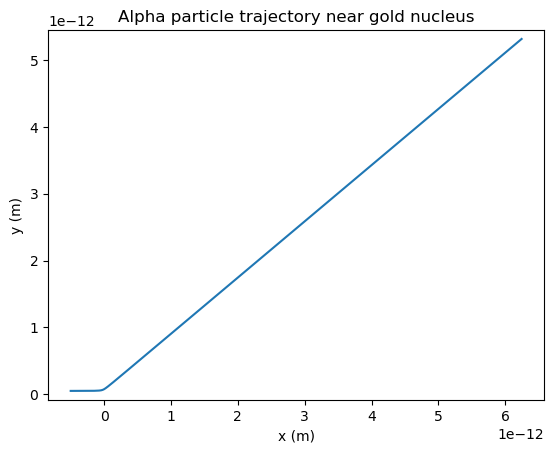

In [13]:
#part 1
#initial conditions
N = 1 #nummber of particles I am simulating
D = 0
ry, rz = 0,0 #need random choice
m = 6.64465734E-27 #kg, alpha particle
z = 2 #number of protons, alpha particle
M = 3.979E-25 #kg, gold nucleus
Z = 79 # number of protons, gold atom
K = 6.0 * 1.602E-13 # 6 MeV potential / 1.60E-13 MeV/J
e = 1.60217662e-19
eps0 = 8.85418782e-12
V0 = np.sqrt(2*K/m)
K = 6.0 * 1.602e-13
del_t = 1e-22
t_max = 5e-19
t = np.arange(0, t_max, del_t)

# initializations
xRK, yRK = np.zeros(len(t)), np.zeros(len(t))
vRKx, vRKy = np.zeros(len(t)), np.zeros(len(t))
xRK[0] = -5e-13      
yRK[0] = 5e-14        
vRKx[0] = V0           
vRKy[0] = 0.0
theta_out = np.zeros(N) #array to hold results (theta values)

#coulombs constant
k = (1/(4*np.pi*eps0))*(z*Z*e**2)/ m 

def acceleration(x,y):
    r2 = x*x+y*y
    r3 = (r2+1e-30)**1.5
    return k*x/r3, k*y/r3

    
#particle loop
for i in range (len(t)-1):
    #k1
    ax, ay = acceleration(xRK[i], yRK[i])
    kx1, ky1 = vRKx[i], vRKy[i]
    kvx1, kvy1 = ax, ay
    #k2
    ax, ay = acceleration(xRK[i] + 0.5*del_t*kx1, yRK[i] + 0.5*del_t*ky1)
    kx2, ky2 = vRKx[i] + 0.5*del_t*kvx1, vRKy[i] + 0.5*del_t*kvy1
    kvx2, kvy2 = ax, ay
    #k3
    ax, ay = acceleration(xRK[i] + 0.5*del_t*kx2, yRK[i] + 0.5*del_t*ky2)
    kx3, ky3 = vRKx[i] + 0.5*del_t*kvx2, vRKy[i] + 0.5*del_t*kvy2
    kvx3, kvy3 = ax, ay
    #k4
    ax, ay = acceleration(xRK[i] + del_t*kx3, yRK[i] + del_t*ky3)
    kx4, ky4 = vRKx[i] + del_t*kvx3, vRKy[i] + del_t*kvy3
    kvx4, kvy4 = ax, ay

    #update position
    xRK[i+1] = xRK[i] + (del_t/6)*(kx1 + 2*kx2 + 2*kx3 + kx4)
    yRK[i+1] = yRK[i] + (del_t/6)*(ky1 + 2*ky2 + 2*ky3 + ky4)

    #update velocity
    vRKx[i+1] = vRKx[i] + (del_t/6)*(kvx1 + 2*kvx2 + 2*kvx3 + kvx4)
    vRKy[i+1] = vRKy[i] + (del_t/6)*(kvy1 + 2*kvy2 + 2*kvy3 + kvy4)

theta_in = 0.0 
theta_out = np.arctan2(vRKy[-1], vRKx[-1])
deflection_angle = np.degrees(theta_out - theta_in)

print(deflection_angle)

plt.plot(xRK, yRK)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Alpha particle trajectory near gold nucleus")
plt.axis("equal")
plt.show()

#t_0 = time.time()
#100
#t1 = time.time()
#acceleration done by Euler
#cooling function
#all three directions
#going over each timestep and adding to the end of the list

0.5976340770721436
[19.95078959 21.20866007 28.99282113 45.60027075 20.41721189 20.81391556
 21.3156491  42.35030428 30.16466912 21.30197025]


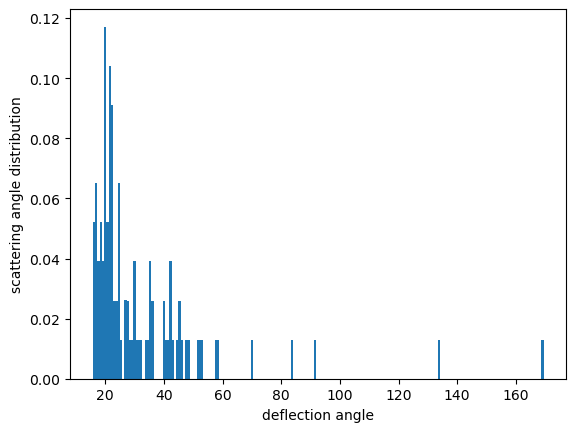

In [23]:
#part 2

import time

m = 6.64465734E-27
M = 3.979E-25
z = 2
Z = 79
e = 1.60217662e-19
eps0 = 8.85418782e-12
E_alpha = 6.0e6 * e
K = 6.0*1.602e-13
del_t = 1e-22
t_max= 5e-19
n_steps= int(t_max/del_t)
V0 = np.sqrt(2*E_alpha/m)
k=(1/(4*np.pi*eps0))*(z*Z*e**2)/ m 

def acceleration(x,y,z):
    r2 = x*x + y*y + z*z
    r3 = (r2+1e-30)**1.5
    return k*x/r3, k*y/r3,k*z/r3

N = 1000000
theta_out = np.zeros(N)
t0 = time.time()

for n in range(N):
    y0 = np.random.uniform(-1e-13, 1e-13)
    z0 = np.random.uniform(-1e-13, 1e-13)
    x,y,z = -5e-13, y0, z0
    vx,vy,vz= V0, 0.0, 0.0

#euler
    for _ in range(n_steps):
        ax,ay,az=acceleration(x,y,z)
        vx += ax*del_t
        vy += ay*del_t
        vz += az*del_t
        x+= vx*del_t
        y+= vy*del_t
        z += vz*del_t

#angle 
    theta_out[n] = np.degrees(np.arctan2(np.sqrt(vy**2+vz**2), vx))

t1 = time.time()
print(t1-t0)
print(theta_out[:10])

plt.hist(theta_out, bins=200, density=True)
plt.xlabel("deflection angle")
plt.ylabel("scattering angle distribution")
plt.show()

31.204930782318115 seconds


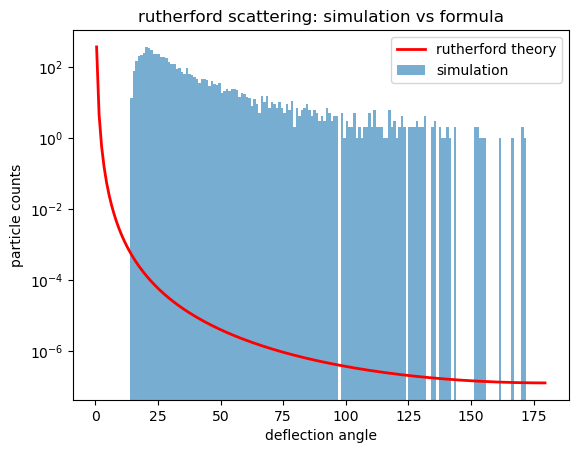

In [25]:
#part 3 
import numpy as np
import matplotlib.pyplot as plt
import time

m = 6.64465734E-27  
z = 2
Z = 79
e = 1.60217662e-19
eps0 = 8.85418782e-12

E_alpha = 6.0e6 * e   # J
V0 = np.sqrt(2*E_alpha/m)

del_t = 1e-22
t_max = 5e-19
n_steps = int(t_max/del_t)
k = (1/(4*np.pi*eps0)) * (z*Z*e**2) / m

def acceleration(x, y, z):
    r2 = x*x + y*y + z*z
    r3 = (r2 + 1e-30)**1.5
    return k*x/r3, k*y/r3, k*z/r3

N = 5000
theta_out = np.zeros(N)

t0 = time.time()

for n in range(N):
    y0 = np.random.uniform(-1e-13, 1e-13)
    z0 = np.random.uniform(-1e-13, 1e-13)
    x, y, z = -5e-13, y0, z0
    vx, vy, vz = V0, 0.0, 0.0

#euler
    for _ in range(n_steps):
        ax, ay, az = acceleration(x, y, z)
        vx += ax*del_t
        vy += ay*del_t
        vz += az*del_t
        x += vx*del_t
        y += vy*del_t
        z += vz*del_t

    theta_out[n] = np.degrees(np.arctan2(np.sqrt(vy**2 + vz**2), vx))

t1 = time.time()
print(t1 - t0, "seconds")

counts, bins = np.histogram(theta_out, bins=180, range=(0,180))
bin_centers = 0.5*(bins[1:]+bins[:-1])
theta_rad = np.radians(bin_centers)
theory = (1/np.sin(theta_rad/2)**4)
theory_scaled = theory / np.max(theory) * np.max(counts)

plt.figure()
plt.bar(bin_centers, counts, width=1.0, alpha=0.6, label="simulation")
plt.plot(bin_centers, theory_scaled, 'r-', lw=2, label="rutherford theory")
plt.yscale("log")
plt.xlabel("deflection angle")
plt.ylabel("particle counts")
plt.title("rutherford scattering: simulation vs formula")
plt.legend()
plt.show()
